In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)
# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [3]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

We fill in the missing values using interpolation since our data is a time series data.

In [7]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = useducation_df["STATE"].unique()

for state in states:
    useducation_df.loc[useducation_df["STATE"] == state, fill_list] = useducation_df.loc[useducation_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
useducation_df.dropna(inplace=True)

1. Consider the two variables:
 Total_revenue and Total_expenditure. Do these variables have outlier values?

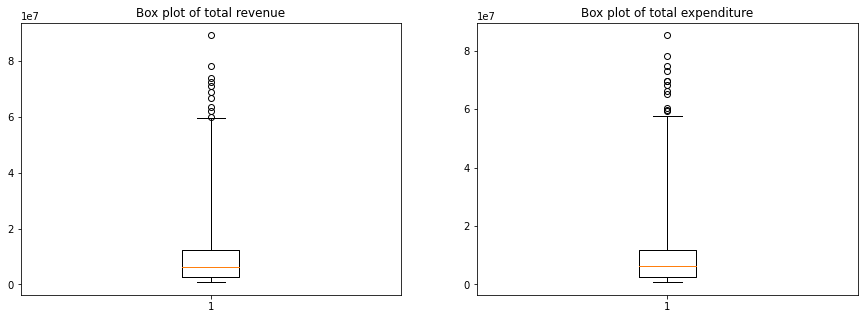

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(useducation_df['TOTAL_REVENUE'], whis = 5)
plt.title("Box plot of total revenue")

plt.subplot(1,2,2)
plt.boxplot(useducation_df["TOTAL_EXPENDITURE"], whis = 5)
plt.title("Box plot of total expenditure")
plt.show()

We can see that both variables have outlier values.

If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values afterwards you handled them.

We'll use winsorization to eliminate the outliers and create two new variables called winsorized_revenue and winsorized_expenditure for the winsorized variants. 

In [15]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(useducation_df['TOTAL_REVENUE'], (0,0.05))
winsorized_expenditure = winsorize(useducation_df['TOTAL_EXPENDITURE'], (0,0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x16f05e63850>,
 'caps': [<matplotlib.lines.Line2D at 0x16f05e63df0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f05e636a0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f05e733d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f05e736a0>],
 'means': []}

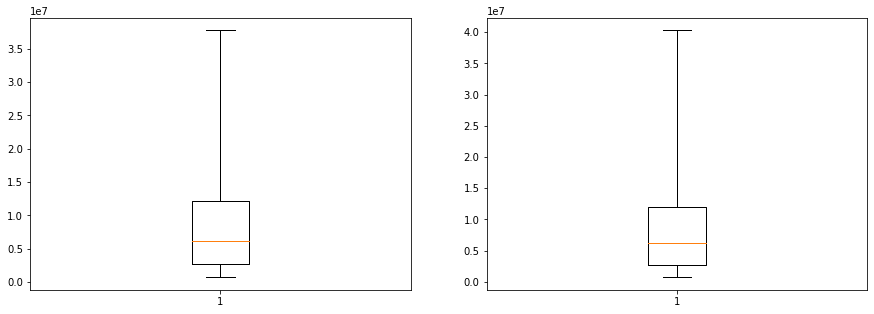

In [16]:
# Checking whether the outliers have been eliminated after winsorization

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_revenue, whis = 5)
plt.subplot(1,2,2)
plt.boxplot(winsorized_expenditure, whis = 5)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f05ed73d0>,
 'caps': [<matplotlib.lines.Line2D at 0x16f05ed7970>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f05ed70d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f05ed7f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f05ee0220>],
 'means': []}

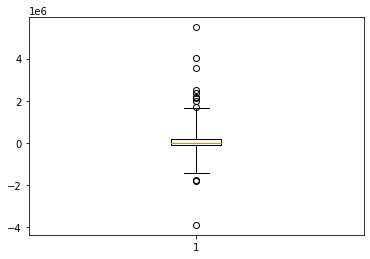

In [18]:
budget_deficit = useducation_df['TOTAL_EXPENDITURE']- useducation_df['TOTAL_REVENUE']
plt.boxplot(budget_deficit , whis =5)

In [20]:
# We see that there are outliers in both tails
winsorized_budget_deficit = winsorize(budget_deficit, (0.05,0.05))

{'whiskers': [<matplotlib.lines.Line2D at 0x16f05f45100>,
 'caps': [<matplotlib.lines.Line2D at 0x16f05f456a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f05f37dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f05f45c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f05f45f10>],
 'means': []}

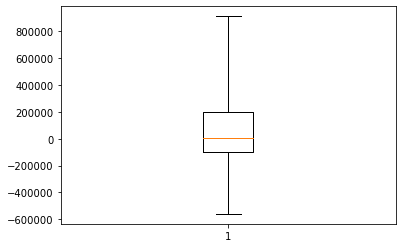

In [21]:
plt.boxplot(winsorized_budget_deficit,whis =5)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f061c0400>,
 'caps': [<matplotlib.lines.Line2D at 0x16f061c09a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f061a4f10>],
 'medians': [<matplotlib.lines.Line2D at 0x16f061c0f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f061cd250>],
 'means': []}

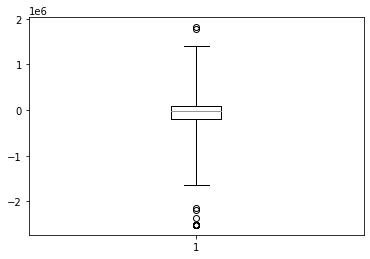

In [26]:
new_variable = winsorized_revenue - winsorized_expenditure
plt.boxplot(new_variable, whis =5)

{'whiskers': [<matplotlib.lines.Line2D at 0x16f06215f40>,
 'caps': [<matplotlib.lines.Line2D at 0x16f06225520>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f06215c70>],
 'medians': [<matplotlib.lines.Line2D at 0x16f06225af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f06225dc0>],
 'means': []}

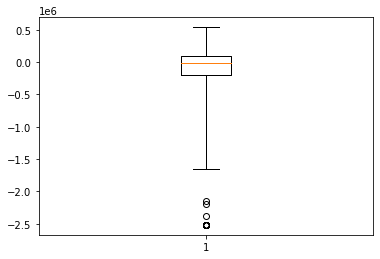

In [27]:
# We see that there are outliers hence we try to eliminate them
winsorized_new_variable = winsorize(new_variable, (0.05,0.05))
plt.boxplot(winsorized_new_variable, whis =5)

In [28]:
# We have successfully eliminated many of the outliers. If we increase the lower bound of the winsorization, the remaining few ones also would be eliminated but for consistency with the analysis above, we keep winsorizing the values using 5% as the threshols percentiles at both ends.

In [29]:
pd.DataFrame({'original_budget': budget_deficit, 'winsorized_budget':winsorized_budget_deficit, 'winsorized_budget2': winsorized_new_variable }).describe()

,original_budget,winsorozed_budget,winsorized_budget2
count,4.660000e+02,466.000000,4.660000e+02
mean,8.094882e+04,58733.012876,-1.720532e+05
std,6.144222e+05,341300.816505,6.509561e+05
min,-3.897129e+06,-560511.000000,-2.518429e+06
25%,-1.013948e+05,-101394.750000,-2.047750e+05
50%,8.872500e+03,8872.500000,-1.282350e+04
75%,1.965748e+05,196574.750000,9.826300e+04
max,5.487742e+06,913765.000000,5.400550e+05


# The mean,median,maz for winsorized_budget and winsorized_budget2 is different. This implies that chosing the outlier elimination strategy is very critical as it substancially affects the statistics of the variables! 

If our variable of interest is the budget deficit variable, which method do you think is the most appropriate one in dealing with the outliers in this variable. The method in the third question or the one in the fourth question?

Sometimes, differencing may help us to eliminate the outliers. So, it's better to first create a variable from the originals and then to apply outlier elimination techniques next. Hence, the approach in the third question is more desirable in most of the cases.